# **Klasifikasi Iris dengan Perception**

Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.

Untuk nembah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.


---



# **Import Library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Load Data**

In [2]:
# Load Data from Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [94]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Week 09/Praktikum 1/Iris.csv', encoding='utf-8')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Encoding Label**

In [95]:
# get the first 100 class labels that correspond to 50 setosa and 50 versicolor
# mengambil indeks ke-5 (Species) dari dataframe df
y = df.iloc[0:100, 5].values

# encodeing label/convert the class labels into the two integers class labels
y = np.where(y=='Iris-setosa', 0, 1)

In [96]:
# extract sepal length and petal length
X = df.iloc[0:100, [1,3]].values

# **Visualisasi Data Awal yang Telah di-Encode**

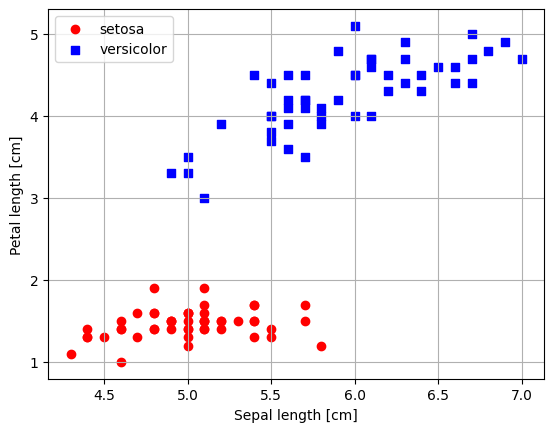

In [97]:
# plot data
# setosa = X[:50, 0], X[:50, 1]
# versicolor = X[50:100, 0], X[50:100, 1]

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')

plt.legend(loc='upper left')
plt.grid()
plt.show()

# **Membuat Kelas Perception**

In [100]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_=np.float_(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

# **Fitting Model**

In [101]:
ppn = Perceptron(eta=0.1, n_iter = 10)

# eta -> learning rate 0.0 to 1.0
# n_iter -> passes over the training dataset



ppn.fit(X,y)

# X = df.iloc[0:100, [1,3]].values
# y = np.where((df.iloc[0:100, 5].values)=='Iris-setosa',0,1)

# **Visualisasi Nilai Error per-Epoch**

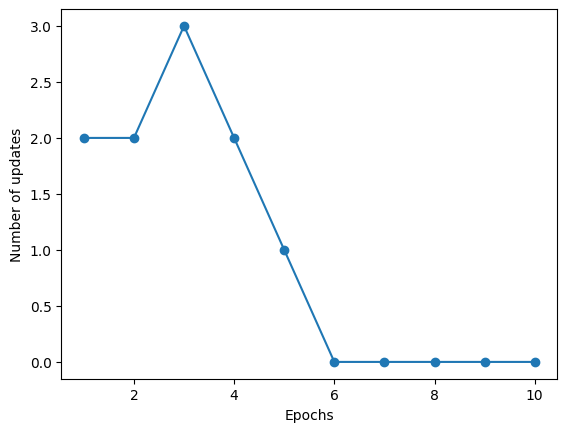

In [102]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

# **Visualisasi Decision Boundary**

In [103]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ( 'o', 's', '^','v','<')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1,xx2, z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker = markers[idx], label=f'Class {cl}',
                    edgecolor='black')

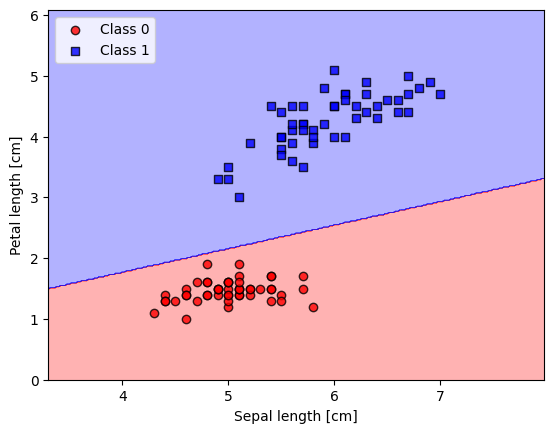

In [104]:
plot_decision_regions(X, y, classifier=ppn)

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()
